In [2]:
import numpy as np
seed = 7
np.random.seed(seed)

In [4]:
import pandas as pd

In [5]:
#trainig
train = pd.read_csv("C:/Users/Katta's/PycharmProjects/data/usecase3/train.csv")
#test 
test = pd.read_csv("C:/Users/Katta's/PycharmProjects/data/usecase3/test.csv")


In [6]:
train_x = train.drop(['Id', 'SalePrice'], axis=1)
train_y = train['SalePrice']

In [7]:
train_x_nonulls = train_x.fillna(" ")

In [9]:

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [11]:
categorical = list(train_x_nonulls.select_dtypes(include=['object', 'int64']).columns.values)
print(categorical)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [ ]:
for cat in categorical:
    train_x_nonulls[cat] = encoder.fit_transform(train_x_nonulls[cat].astype(str))


In [48]:
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(79, activation='relu', kernel_initializer='normal'))
model.add(Dense(50, activation='relu', kernel_initializer='normal'))
model.add(Dense(30, activation='relu', kernel_initializer='normal'))
model.add(Dense(10, activation='relu', kernel_initializer='normal'))
model.add(Dense(1))

In [49]:
_opt= 'adam'
_loss = 'mean_squared_error'

In [50]:
model.compile(loss=_loss, optimizer=_opt, metrics=['accuracy'])

In [51]:
# Early stopping 
from keras.callbacks import EarlyStopping
_es_monitor = 'val_loss'
_es_patience = 100
es = EarlyStopping(monitor=_es_monitor, mode='min', verbose=1, patience=_es_patience)

In [52]:
# Model check point
from keras.callbacks import ModelCheckpoint
_mc_model_location = 'v1_model.h5'
_mc_monitor = 'val_acc'
mc = ModelCheckpoint(_mc_model_location, monitor=_mc_monitor, mode='max', verbose=1, save_best_only=True)

In [53]:
#define batch size and number of epchos 
_batch_size = 32
_epochs = 100
history = model.fit(train_x_nonulls.values, train_y.values, validation_split=0.20,
                    epochs=_epochs, batch_size = 32, verbose=1, callbacks=[es, mc])

Train on 1168 samples, validate on 292 samples
Epoch 1/100


  32/1168 [..............................] - ETA: 14s - loss: 31789582336.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 1s 430us/step - loss: 38802911989.4795 - acc: 0.0000e+00 - val_loss: 39810639114.5205 - val_acc: 0.0000e+00



Epoch 00001: val_acc improved from -inf to 0.00000, saving model to v1_model.h5


Epoch 2/100
  32/1168 [..............................] - ETA: 0s - loss: 34857418752.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 38us/step - loss: 37425312922.3014 - acc: 0.0000e+00 - val_loss: 34599352853.0411 - val_acc: 0.0000e+00



Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/100
  32/1168 [..............................] - ETA: 0s - loss: 35382849536.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 43us/step - loss: 21261904461.1507 - acc: 0.0000e+00 - val_loss: 8024808651.3973 - val_acc: 0.0000e+00



Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/100
  32/1168 [..............................] - ETA: 0s - loss: 6838615552.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 39us/step - loss: 7327793187.0685 - acc: 0.0000e+00 - val_loss: 7347587061.4795 - val_acc: 0.0000e+00



Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/100
  32/1168 [..............................] - ETA: 0s - loss: 6892151296.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 48us/step - loss: 6502536476.0548 - acc: 0.0000e+00 - val_loss: 6732216462.0274 - val_acc: 0.0000e+00



Epoch 00005: val_acc did not improve from 0.00000
Epoch 6/100
  32/1168 [..............................] - ETA: 0s - loss: 6019485696.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 49us/step - loss: 5852858613.4795 - acc: 0.0000e+00 - val_loss: 6289266191.7808 - val_acc: 0.0000e+00



Epoch 00006: val_acc did not improve from 0.00000
Epoch 7/100
  32/1168 [..............................] - ETA: 0s - loss: 3388833792.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 46us/step - loss: 5270200849.5342 - acc: 0.0000e+00 - val_loss: 5678429792.4384 - val_acc: 0.0000e+00



Epoch 00007: val_acc did not improve from 0.00000
Epoch 8/100
  32/1168 [..............................] - ETA: 0s - loss: 4198012928.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 44us/step - loss: 4726968663.6712 - acc: 0.0000e+00 - val_loss: 5147504952.1096 - val_acc: 0.0000e+00



Epoch 00008: val_acc did not improve from 0.00000
Epoch 9/100
  32/1168 [..............................] - ETA: 0s - loss: 3226694400.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 47us/step - loss: 4125308545.7534 - acc: 0.0000e+00 - val_loss: 4546668175.7808 - val_acc: 0.0000e+00



Epoch 00009: val_acc did not improve from 0.00000
Epoch 10/100
  32/1168 [..............................] - ETA: 0s - loss: 2892909568.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 45us/step - loss: 3641328187.6164 - acc: 0.0000e+00 - val_loss: 4191106780.9315 - val_acc: 0.0000e+00



Epoch 00010: val_acc did not improve from 0.00000
Epoch 11/100
  32/1168 [..............................] - ETA: 0s - loss: 6131843584.0000 - acc: 0.0000e+00

1120/1168 [===========================>..] - ETA: 0s - loss: 3367361974.8571 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 54us/step - loss: 3310646026.5205 - acc: 0.0000e+00 - val_loss: 3880934023.0137 - val_acc: 0.0000e+00



Epoch 00011: val_acc did not improve from 0.00000
Epoch 12/100
  32/1168 [..............................] - ETA: 0s - loss: 2449315072.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 46us/step - loss: 3121905986.6301 - acc: 0.0000e+00 - val_loss: 3764142399.1233 - val_acc: 0.0000e+00



Epoch 00012: val_acc did not improve from 0.00000
Epoch 13/100
  32/1168 [..............................] - ETA: 0s - loss: 4219896576.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 45us/step - loss: 2973991511.6712 - acc: 0.0000e+00 - val_loss: 3670916376.5479 - val_acc: 0.0000e+00



Epoch 00013: val_acc did not improve from 0.00000
Epoch 14/100
  32/1168 [..............................] - ETA: 0s - loss: 1455320448.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 48us/step - loss: 2895675514.7397 - acc: 0.0000e+00 - val_loss: 3619305517.5890 - val_acc: 0.0000e+00



Epoch 00014: val_acc did not improve from 0.00000
Epoch 15/100
  32/1168 [..............................] - ETA: 0s - loss: 1996068352.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 45us/step - loss: 2850672413.8082 - acc: 0.0000e+00 - val_loss: 3589610033.0959 - val_acc: 0.0000e+00



Epoch 00015: val_acc did not improve from 0.00000
Epoch 16/100
  32/1168 [..............................] - ETA: 0s - loss: 2153964288.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 46us/step - loss: 2793326535.8904 - acc: 0.0000e+00 - val_loss: 3561913449.2055 - val_acc: 0.0000e+00



Epoch 00016: val_acc did not improve from 0.00000
Epoch 17/100
  32/1168 [..............................] - ETA: 0s - loss: 1515396608.0000 - acc: 0.0000e+00

1152/1168 [============================>.] - ETA: 0s - loss: 2765297831.1111 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 54us/step - loss: 2758681175.6712 - acc: 0.0000e+00 - val_loss: 3557326304.4384 - val_acc: 0.0000e+00



Epoch 00017: val_acc did not improve from 0.00000
Epoch 18/100


  32/1168 [..............................] - ETA: 0s - loss: 3382605312.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 50us/step - loss: 2742860347.6164 - acc: 0.0000e+00 - val_loss: 3639746640.6575 - val_acc: 0.0000e+00



Epoch 00018: val_acc did not improve from 0.00000
Epoch 19/100
  32/1168 [..............................]

 - ETA: 0s - loss: 1807613312.0000 - acc: 0.0000e+00



 992/1168 [========================>.....] - ETA: 0s - loss: 2614430513.5484 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 58us/step - loss: 2708987374.4658 - acc: 0.0000e+00 - val_loss: 3546906550.3562 - val_acc: 0.0000e+00



Epoch 00019: val_acc did not improve from 0.00000
Epoch 20/100
  32/1168 [..............................] - ETA: 0s - loss: 4313314304.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 47us/step - loss: 2680220270.4658 - acc: 0.0000e+00 - val_loss: 3472365666.1918 - val_acc: 0.0000e+00



Epoch 00020: val_acc did not improve from 0.00000
Epoch 21/100


  32/1168 [..............................] - ETA: 0s - loss: 1783459328.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 50us/step - loss: 2633578701.1507 - acc: 0.0000e+00 - val_loss: 3440548734.2466 - val_acc: 0.0000e+00



Epoch 00021: val_acc did not improve from 0.00000
Epoch 22/100


  32/1168 [..............................] - ETA: 0s - loss: 2031036800.0000 - acc: 0.0000e+00



1088/1168 [==========================>...] - ETA: 0s - loss: 2487384169.4118 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 58us/step - loss: 2612323629.5890 - acc: 0.0000e+00 - val_loss: 3419337436.9315 - val_acc: 0.0000e+00



Epoch 00022: val_acc did not improve from 0.00000
Epoch 23/100
  32/1168 [..............................] - ETA: 0s - loss: 1632876544.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 50us/step - loss: 2583976391.8904 - acc: 0.0000e+00 - val_loss: 3395702240.4384 - val_acc: 0.0000e+00



Epoch 00023: val_acc did not improve from 0.00000
Epoch 24/100
  32/1168 [..............................] - ETA: 0s - loss: 5687562752.0000 - acc: 0.0000e+00



1152/1168 [============================>.] - ETA: 0s - loss: 2604864426.6667 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 56us/step - loss: 2583165340.0548 - acc: 0.0000e+00 - val_loss: 3406632658.4110 - val_acc: 0.0000e+00



Epoch 00024: val_acc did not improve from 0.00000
Epoch 25/100
  32/1168 [..............................] - ETA: 0s - loss: 2231941120.0000 - acc: 0.0000e+00



1056/1168 [==========================>...] - ETA: 0s - loss: 2553170148.8485 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 61us/step - loss: 2538210514.4110 - acc: 0.0000e+00 - val_loss: 3359621141.0411 - val_acc: 0.0000e+00



Epoch 00025: val_acc did not improve from 0.00000
Epoch 26/100
  32/1168 [..............................] - ETA: 0s - loss: 4123438848.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 48us/step - loss: 2515860648.3288 - acc: 0.0000e+00 - val_loss: 3339684769.3151 - val_acc: 0.0000e+00



Epoch 00026: val_acc did not improve from 0.00000
Epoch 27/100
  32/1168 [..............................] - ETA: 0s - loss: 1803871872.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 51us/step - loss: 2506368388.3836 - acc: 0.0000e+00 - val_loss: 3337572516.8219 - val_acc: 0.0000e+00



Epoch 00027: val_acc did not improve from 0.00000
Epoch 28/100
  32/1168 [..............................] - ETA: 0s - loss: 2290826496.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 50us/step - loss: 2477273030.1370 - acc: 0.0000e+00 - val_loss: 3300045269.9178 - val_acc: 0.0000e+00



Epoch 00028: val_acc did not improve from 0.00000
Epoch 29/100


  32/1168 [..............................] - ETA: 0s - loss: 8578315776.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 50us/step - loss: 2456361571.9452 - acc: 0.0000e+00 - val_loss: 3283366512.2192 - val_acc: 0.0000e+00



Epoch 00029: val_acc did not improve from 0.00000
Epoch 30/100
  32/1168 [..............................] - ETA: 0s - loss: 1770540160.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 44us/step - loss: 2426900564.1644 - acc: 0.0000e+00 - val_loss: 3291107338.5205 - val_acc: 0.0000e+00



Epoch 00030: val_acc did not improve from 0.00000
Epoch 31/100
  32/1168 [..............................] - ETA: 0s - loss: 2474466304.0000 - acc: 0.0000e+00

1120/1168 [===========================>..] - ETA: 0s - loss: 2439320190.1714 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 56us/step - loss: 2418514351.3425 - acc: 0.0000e+00 - val_loss: 3308069125.2603 - val_acc: 0.0000e+00



Epoch 00031: val_acc did not improve from 0.00000
Epoch 32/100
  32/1168 [..............................] - ETA: 0s - loss: 1675527936.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 44us/step - loss: 2408460472.1096 - acc: 0.0000e+00 - val_loss: 3225086674.4110 - val_acc: 0.0000e+00



Epoch 00032: val_acc did not improve from 0.00000
Epoch 33/100
  32/1168 [..............................] - ETA: 0s - loss: 993237248.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 50us/step - loss: 2391912125.3699 - acc: 0.0000e+00 - val_loss: 3216492226.6301 - val_acc: 0.0000e+00



Epoch 00033: val_acc did not improve from 0.00000
Epoch 34/100
  32/1168 [..............................] - ETA: 0s - loss: 933239168.0000 - acc: 0.0000e+00



1120/1168 [===========================>..] - ETA: 0s - loss: 2428955322.5143 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 56us/step - loss: 2364132008.3288 - acc: 0.0000e+00 - val_loss: 3193392941.5890 - val_acc: 0.0000e+00



Epoch 00034: val_acc did not improve from 0.00000
Epoch 35/100


  32/1168 [..............................] - ETA: 0s - loss: 1142387328.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 46us/step - loss: 2329618688.8767 - acc: 0.0000e+00 - val_loss: 3184784366.4658 - val_acc: 0.0000e+00



Epoch 00035: val_acc did not improve from 0.00000
Epoch 36/100
  32/1168 [..............................] - ETA: 0s - loss: 1914973952.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 46us/step - loss: 2318383130.3014 - acc: 0.0000e+00 - val_loss: 3187334066.8493 - val_acc: 0.0000e+00



Epoch 00036: val_acc did not improve from 0.00000
Epoch 37/100


  32/1168 [..............................] - ETA: 0s - loss: 3128534016.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 46us/step - loss: 2275918292.1644 - acc: 0.0000e+00 - val_loss: 3144997200.6575 - val_acc: 0.0000e+00



Epoch 00037: val_acc did not improve from 0.00000
Epoch 38/100
  32/1168 [..............................] - ETA: 0s - loss: 2318089728.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 44us/step - loss: 2277968273.9726 - acc: 0.0000e+00 - val_loss: 3195495231.1233 - val_acc: 0.0000e+00



Epoch 00038: val_acc did not improve from 0.00000
Epoch 39/100
  32/1168 [..............................] - ETA: 0s - loss: 4218307072.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 49us/step - loss: 2261754252.2740 - acc: 0.0000e+00 - val_loss: 3219808196.3836 - val_acc: 0.0000e+00



Epoch 00039: val_acc did not improve from 0.00000
Epoch 40/100
  32/1168 [..............................] - ETA: 0s - loss: 8838041600.0000 - acc: 0.0000e+00

1088/1168 [==========================>...] - ETA: 0s - loss: 2326689057.8824 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 56us/step - loss: 2267586823.0137 - acc: 0.0000e+00 - val_loss: 3112410176.8767 - val_acc: 0.0000e+00



Epoch 00040: val_acc did not improve from 0.00000
Epoch 41/100
  32/1168 [..............................] - ETA: 0s - loss: 4968633344.0000 - acc: 0.0000e+00



1152/1168 [============================>.] - ETA: 0s - loss: 2221714270.2222 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 53us/step - loss: 2224970010.3014 - acc: 0.0000e+00 - val_loss: 3092530232.1096 - val_acc: 0.0000e+00



Epoch 00041: val_acc did not improve from 0.00000
Epoch 42/100
  32/1168 [..............................] - ETA: 0s - loss: 1627854592.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 44us/step - loss: 2211854540.2740 - acc: 0.0000e+00 - val_loss: 3096969664.8767 - val_acc: 0.0000e+00



Epoch 00042: val_acc did not improve from 0.00000
Epoch 43/100
  32/1168 [..............................] - ETA: 0s - loss: 994984832.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 46us/step - loss: 2207885892.3836 - acc: 0.0000e+00 - val_loss: 3073284166.1370 - val_acc: 0.0000e+00



Epoch 00043: val_acc did not improve from 0.00000
Epoch 44/100
  32/1168 [..............................] - ETA: 0s - loss: 1235706368.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 44us/step - loss: 2191314644.1644 - acc: 0.0000e+00 - val_loss: 3044229158.5753 - val_acc: 0.0000e+00



Epoch 00044: val_acc did not improve from 0.00000
Epoch 45/100
  32/1168 [..............................] - ETA: 0s - loss: 2137359360.0000 - acc: 0.0000e+00

1056/1168 [==========================>...] - ETA: 0s - loss: 2163472866.9091 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 61us/step - loss: 2183780984.9863 - acc: 0.0000e+00 - val_loss: 3030688452.3836 - val_acc: 0.0000e+00



Epoch 00045: val_acc did not improve from 0.00000
Epoch 46/100
  32/1168 [..............................] - ETA: 0s - loss: 3602701824.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 47us/step - loss: 2165919886.0274 - acc: 0.0000e+00 - val_loss: 3018281535.1233 - val_acc: 0.0000e+00



Epoch 00046: val_acc did not improve from 0.00000
Epoch 47/100
  32/1168 [..............................] - ETA: 0s - loss: 2059949824.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 47us/step - loss: 2153751872.8767 - acc: 0.0000e+00 - val_loss: 2997851714.6301 - val_acc: 0.0000e+00



Epoch 00047: val_acc did not improve from 0.00000
Epoch 48/100
  32/1168 [..............................] - ETA: 0s - loss: 3072910592.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 44us/step - loss: 2135997825.7534 - acc: 0.0000e+00 - val_loss: 3043431329.3151 - val_acc: 0.0000e+00



Epoch 00048: val_acc did not improve from 0.00000
Epoch 49/100
  32/1168 [..............................] - ETA: 0s - loss: 3016109312.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 44us/step - loss: 2117327202.1918 - acc: 0.0000e+00 - val_loss: 2966757368.9863 - val_acc: 0.0000e+00



Epoch 00049: val_acc did not improve from 0.00000
Epoch 50/100
  32/1168 [..............................] - ETA: 0s - loss: 3835079168.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 48us/step - loss: 2098096928.4384 - acc: 0.0000e+00 - val_loss: 2980641844.6027 - val_acc: 0.0000e+00



Epoch 00050: val_acc did not improve from 0.00000
Epoch 51/100
  32/1168 [..............................] - ETA: 0s - loss: 1904763264.0000 - acc: 0.0000e+00

 928/1168 [======================>.......] - ETA: 0s - loss: 2143490749.7931 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 63us/step - loss: 2085673822.6849 - acc: 0.0000e+00 - val_loss: 2962852685.1507 - val_acc: 0.0000e+00



Epoch 00051: val_acc did not improve from 0.00000
Epoch 52/100
  32/1168 [..............................] - ETA: 0s - loss: 852262720.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 49us/step - loss: 2075112858.3014 - acc: 0.0000e+00 - val_loss: 2929916857.8630 - val_acc: 0.0000e+00



Epoch 00052: val_acc did not improve from 0.00000
Epoch 53/100
  32/1168 [..............................] - ETA: 0s - loss: 3300381184.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 44us/step - loss: 2081207033.8630 - acc: 0.0000e+00 - val_loss: 2929110966.3562 - val_acc: 0.0000e+00



Epoch 00053: val_acc did not improve from 0.00000
Epoch 54/100
  32/1168 [..............................] - ETA: 0s - loss: 1499549440.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 46us/step - loss: 2043556394.0822 - acc: 0.0000e+00 - val_loss: 3040897546.5205 - val_acc: 0.0000e+00



Epoch 00054: val_acc did not improve from 0.00000
Epoch 55/100
  32/1168 [..............................] - ETA: 0s - loss: 1943136256.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 44us/step - loss: 2061196593.0959 - acc: 0.0000e+00 - val_loss: 2925088806.5753 - val_acc: 0.0000e+00



Epoch 00055: val_acc did not improve from 0.00000
Epoch 56/100
  32/1168 [..............................] - ETA: 0s - loss: 2926226176.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 51us/step - loss: 2035893980.9315 - acc: 0.0000e+00 - val_loss: 2929059398.1370 - val_acc: 0.0000e+00



Epoch 00056: val_acc did not improve from 0.00000
Epoch 57/100
  32/1168 [..............................] - ETA: 0s - loss: 1132827392.0000 - acc: 0.0000e+00

1152/1168 [============================>.] - ETA: 0s - loss: 2021034707.5556 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 53us/step - loss: 2004600868.8219 - acc: 0.0000e+00 - val_loss: 2915600492.7123 - val_acc: 0.0000e+00



Epoch 00057: val_acc did not improve from 0.00000
Epoch 58/100
  32/1168 [..............................] - ETA: 0s - loss: 1353427712.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 46us/step - loss: 1992981265.5342 - acc: 0.0000e+00 - val_loss: 2868812060.0548 - val_acc: 0.0000e+00



Epoch 00058: val_acc did not improve from 0.00000
Epoch 59/100
  32/1168 [..............................] - ETA: 0s - loss: 1205315968.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 42us/step - loss: 1992040349.8082 - acc: 0.0000e+00 - val_loss: 2845196784.2192 - val_acc: 0.0000e+00



Epoch 00059: val_acc did not improve from 0.00000
Epoch 60/100
  32/1168 [..............................] - ETA: 0s - loss: 998103808.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 42us/step - loss: 2003606516.6027 - acc: 0.0000e+00 - val_loss: 2861174906.7397 - val_acc: 0.0000e+00



Epoch 00060: val_acc did not improve from 0.00000
Epoch 61/100
  32/1168 [..............................] - ETA: 0s - loss: 2442117888.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 47us/step - loss: 1980854284.2740 - acc: 0.0000e+00 - val_loss: 2854187497.2055 - val_acc: 0.0000e+00



Epoch 00061: val_acc did not improve from 0.00000
Epoch 62/100
  32/1168 [..............................] - ETA: 0s - loss: 3374198784.0000 - acc: 0.0000e+00

1152/1168 [============================>.] - ETA: 0s - loss: 1975339339.5556 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 55us/step - loss: 1957249714.8493 - acc: 0.0000e+00 - val_loss: 2828140324.8219 - val_acc: 0.0000e+00



Epoch 00062: val_acc did not improve from 0.00000
Epoch 63/100
  32/1168 [..............................] - ETA: 0s - loss: 3281608704.0000 - acc: 0.0000e+00



1120/1168 [===========================>..] - ETA: 0s - loss: 1987485465.6000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 58us/step - loss: 1951741133.1507 - acc: 0.0000e+00 - val_loss: 2814136225.3151 - val_acc: 0.0000e+00



Epoch 00063: val_acc did not improve from 0.00000
Epoch 64/100
  32/1168 [..............................] - ETA: 0s - loss: 1668655232.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 43us/step - loss: 1925766556.0548 - acc: 0.0000e+00 - val_loss: 2832796686.0274 - val_acc: 0.0000e+00



Epoch 00064: val_acc did not improve from 0.00000
Epoch 65/100
  32/1168 [..............................] - ETA: 0s - loss: 681397888.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 50us/step - loss: 1944844495.7808 - acc: 0.0000e+00 - val_loss: 2793038641.0959 - val_acc: 0.0000e+00



Epoch 00065: val_acc did not improve from 0.00000
Epoch 66/100
  32/1168 [..............................] - ETA: 0s - loss: 2337500672.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 44us/step - loss: 1909349251.5068 - acc: 0.0000e+00 - val_loss: 2790989283.9452 - val_acc: 0.0000e+00



Epoch 00066: val_acc did not improve from 0.00000
Epoch 67/100
  32/1168 [..............................] - ETA: 0s - loss: 2385945088.0000 - acc: 0.0000e+00

1120/1168 [===========================>..] - ETA: 0s - loss: 1910864603.4286 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 55us/step - loss: 1913175402.9589 - acc: 0.0000e+00 - val_loss: 2763554900.1644 - val_acc: 0.0000e+00



Epoch 00067: val_acc did not improve from 0.00000


Epoch 68/100
  32/1168 [..............................] - ETA: 0s - loss: 1151994112.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 45us/step - loss: 1891262118.5753 - acc: 0.0000e+00 - val_loss: 2762613344.4384 - val_acc: 0.0000e+00



Epoch 00068: val_acc did not improve from 0.00000
Epoch 69/100
  32/1168 [..............................] - ETA: 0s - loss: 883446528.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 56us/step - loss: 1904190737.0959 - acc: 0.0000e+00 - val_loss: 2755487852.7123 - val_acc: 0.0000e+00



Epoch 00069: val_acc did not improve from 0.00000
Epoch 70/100
  32/1168 [..............................] - ETA: 0s - loss: 1646849024.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 49us/step - loss: 1901807323.1781 - acc: 0.0000e+00 - val_loss: 2734242772.1644 - val_acc: 0.0000e+00



Epoch 00070: val_acc did not improve from 0.00000
Epoch 71/100
  32/1168 [..............................] - ETA: 0s - loss: 936092672.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 47us/step - loss: 1881943544.9863 - acc: 0.0000e+00 - val_loss: 2776958790.1370 - val_acc: 0.0000e+00



Epoch 00071: val_acc did not improve from 0.00000
Epoch 72/100
  32/1168 [..............................] - ETA: 0s - loss: 2606601984.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 45us/step - loss: 1895617415.0137 - acc: 0.0000e+00 - val_loss: 2729555427.9452 - val_acc: 0.0000e+00



Epoch 00072: val_acc did not improve from 0.00000
Epoch 73/100


  32/1168 [..............................] - ETA: 0s - loss: 1127343232.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 50us/step - loss: 1859244129.3151 - acc: 0.0000e+00 - val_loss: 2729603177.2055 - val_acc: 0.0000e+00



Epoch 00073: val_acc did not improve from 0.00000
Epoch 74/100


  32/1168 [..............................] - ETA: 0s - loss: 797212672.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 47us/step - loss: 1843659423.5616 - acc: 0.0000e+00 - val_loss: 2755162785.3151 - val_acc: 0.0000e+00



Epoch 00074: val_acc did not improve from 0.00000
Epoch 75/100
  32/1168 [..............................] - ETA: 0s - loss: 2042469504.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 44us/step - loss: 1847858332.0548 - acc: 0.0000e+00 - val_loss: 2699984689.0959 - val_acc: 0.0000e+00



Epoch 00075: val_acc did not improve from 0.00000
Epoch 76/100


  32/1168 [..............................] - ETA: 0s - loss: 2562777600.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 42us/step - loss: 1830384077.1507 - acc: 0.0000e+00 - val_loss: 2693897538.6301 - val_acc: 0.0000e+00



Epoch 00076: val_acc did not improve from 0.00000
Epoch 77/100
  32/1168 [..............................] - ETA: 0s - loss: 2569136128.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 44us/step - loss: 1813092300.2740 - acc: 0.0000e+00 - val_loss: 2685945747.2877 - val_acc: 0.0000e+00



Epoch 00077: val_acc did not improve from 0.00000
Epoch 78/100
  32/1168 [..............................] - ETA: 0s - loss: 647142592.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 42us/step - loss: 1815392405.9178 - acc: 0.0000e+00 - val_loss: 2668210575.7808 - val_acc: 0.0000e+00



Epoch 00078: val_acc did not improve from 0.00000
Epoch 79/100
  32/1168 [..............................] - ETA: 0s - loss: 1316778112.0000 - acc: 0.0000e+00

1024/1168 [=========================>....] - ETA: 0s - loss: 1883951284.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 57us/step - loss: 1801853845.9178 - acc: 0.0000e+00 - val_loss: 2655024874.9589 - val_acc: 0.0000e+00



Epoch 00079: val_acc did not improve from 0.00000
Epoch 80/100
  32/1168 [..............................] - ETA: 0s - loss: 1184225536.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 49us/step - loss: 1801564672.8767 - acc: 0.0000e+00 - val_loss: 2658388981.4795 - val_acc: 0.0000e+00



Epoch 00080: val_acc did not improve from 0.00000
Epoch 81/100


  32/1168 [..............................] - ETA: 0s - loss: 852964352.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 42us/step - loss: 1781056071.8904 - acc: 0.0000e+00 - val_loss: 2708398525.3699 - val_acc: 0.0000e+00



Epoch 00081: val_acc did not improve from 0.00000
Epoch 82/100
  32/1168 [..............................] - ETA: 0s - loss: 3709397760.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 48us/step - loss: 1776564160.0000 - acc: 0.0000e+00 - val_loss: 2657620434.4110 - val_acc: 0.0000e+00



Epoch 00082: val_acc did not improve from 0.00000
Epoch 83/100
  32/1168 [..............................] - ETA: 0s - loss: 870003776.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 42us/step - loss: 1767338892.2740 - acc: 0.0000e+00 - val_loss: 2630616574.2466 - val_acc: 0.0000e+00



Epoch 00083: val_acc did not improve from 0.00000
Epoch 84/100
  32/1168 [..............................] - ETA: 0s - loss: 1125548288.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 41us/step - loss: 1747106505.6438 - acc: 0.0000e+00 - val_loss: 2677981625.8630 - val_acc: 0.0000e+00



Epoch 00084: val_acc did not improve from 0.00000
Epoch 85/100
  32/1168 [..............................] - ETA: 0s - loss: 3286550272.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 47us/step - loss: 1766145534.2466 - acc: 0.0000e+00 - val_loss: 2618610733.5890 - val_acc: 0.0000e+00



Epoch 00085: val_acc did not improve from 0.00000
Epoch 86/100
  32/1168 [..............................] - ETA: 0s - loss: 1302112128.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 47us/step - loss: 1801348530.8493 - acc: 0.0000e+00 - val_loss: 2641411987.2877 - val_acc: 0.0000e+00



Epoch 00086: val_acc did not improve from 0.00000
Epoch 87/100
  32/1168 [..............................] - ETA: 0s - loss: 1405904128.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 43us/step - loss: 1792645191.8904 - acc: 0.0000e+00 - val_loss: 2660059111.4521 - val_acc: 0.0000e+00



Epoch 00087: val_acc did not improve from 0.00000
Epoch 88/100
  32/1168 [..............................] - ETA: 0s - loss: 866177408.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 48us/step - loss: 1739011152.6575 - acc: 0.0000e+00 - val_loss: 2616095368.7671 - val_acc: 0.0000e+00



Epoch 00088: val_acc did not improve from 0.00000
Epoch 89/100
  32/1168 [..............................] - ETA: 0s - loss: 2670697472.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 40us/step - loss: 1740368504.9863 - acc: 0.0000e+00 - val_loss: 2591304514.6301 - val_acc: 0.0000e+00



Epoch 00089: val_acc did not improve from 0.00000
Epoch 90/100
  32/1168 [..............................] - ETA: 0s - loss: 2200188672.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 42us/step - loss: 1716494784.0000 - acc: 0.0000e+00 - val_loss: 2642181947.6164 - val_acc: 0.0000e+00



Epoch 00090: val_acc did not improve from 0.00000
Epoch 91/100
  32/1168 [..............................] - ETA: 0s - loss: 1419588608.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 47us/step - loss: 1704048344.5479 - acc: 0.0000e+00 - val_loss: 2568283111.4521 - val_acc: 0.0000e+00



Epoch 00091: val_acc did not improve from 0.00000
Epoch 92/100
  32/1168 [..............................] - ETA: 0s - loss: 2525990144.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 47us/step - loss: 1717559387.1781 - acc: 0.0000e+00 - val_loss: 2562855381.9178 - val_acc: 0.0000e+00



Epoch 00092: val_acc did not improve from 0.00000
Epoch 93/100
  32/1168 [..............................] - ETA: 0s - loss: 2129188224.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 46us/step - loss: 1678801726.2466 - acc: 0.0000e+00 - val_loss: 2556924193.3151 - val_acc: 0.0000e+00



Epoch 00093: val_acc did not improve from 0.00000
Epoch 94/100
  32/1168 [..............................] - ETA: 0s - loss: 1596573184.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 42us/step - loss: 1693016291.9452 - acc: 0.0000e+00 - val_loss: 2546136199.0137 - val_acc: 0.0000e+00



Epoch 00094: val_acc did not improve from 0.00000
Epoch 95/100
  32/1168 [..............................] - ETA: 0s - loss: 1116389504.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 44us/step - loss: 1661098296.1096 - acc: 0.0000e+00 - val_loss: 2577689589.4795 - val_acc: 0.0000e+00



Epoch 00095: val_acc did not improve from 0.00000
Epoch 96/100
  32/1168 [..............................] - ETA: 0s - loss: 974575936.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 41us/step - loss: 1694188033.7534 - acc: 0.0000e+00 - val_loss: 2545778928.2192 - val_acc: 0.0000e+00



Epoch 00096: val_acc did not improve from 0.00000
Epoch 97/100
  32/1168 [..............................] - ETA: 0s - loss: 1042853312.0000 - acc: 0.0000e+00

1152/1168 [============================>.] - ETA: 0s - loss: 1688946632.8889 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 54us/step - loss: 1685422492.0548 - acc: 0.0000e+00 - val_loss: 2558588212.6027 - val_acc: 0.0000e+00



Epoch 00097: val_acc did not improve from 0.00000
Epoch 98/100
  32/1168 [..............................] - ETA: 0s - loss: 770493120.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 50us/step - loss: 1687053841.5342 - acc: 0.0000e+00 - val_loss: 2579782505.2055 - val_acc: 0.0000e+00



Epoch 00098: val_acc did not improve from 0.00000
Epoch 99/100
  32/1168 [..............................] - ETA: 0s - loss: 611741696.0000 - acc: 0.0000e+00

1168/1168 [==============================] - 0s 44us/step - loss: 1674063461.6986 - acc: 0.0000e+00 - val_loss: 2524655302.1370 - val_acc: 0.0000e+00



Epoch 00099: val_acc did not improve from 0.00000


Epoch 100/100
  32/1168 [..............................] - ETA: 0s - loss: 602237632.0000 - acc: 0.0000e+00



1168/1168 [==============================] - 0s 42us/step - loss: 1641860046.9041 - acc: 0.0000e+00 - val_loss: 2501489628.9315 - val_acc: 0.0000e+00



Epoch 00100: val_acc did not improve from 0.00000


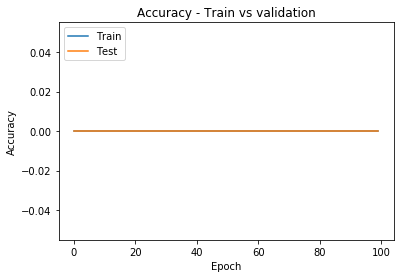

In [54]:
# plot the accuracy - Train vs Valid
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.title('Accuracy - Train vs validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


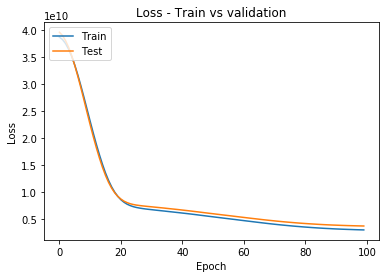

In [44]:

# plot loss - Train vs Valid
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Loss - Train vs validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [46]:
metrics = model.evaluate(train_x_nonulls.values, train_y.values)
print("\n%s: %.2f%%" % (model.metrics_names[1], metrics[1]*100))

  32/1460 [..............................] - ETA: 0s

1460/1460 [==============================] - 0s 18us/step



acc: 0.00%
